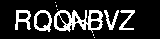

In [1]:
import os
import numpy as np

from PIL import Image
from IPython.display import display

from utils import text_to_img

def show_image(img):
    """Displays an image in a Jupyter Notebook, supporting torch.Tensor, numpy.ndarray, and PIL.Image."""
    # if isinstance(img, torch.Tensor):
    #     img = img.detach().cpu().numpy()  # Ensure it's on CPU and detach from computation graph
    #     if img.ndim == 3 and img.shape[0] in [1, 3]:  # Handle (C, H, W) format
    #         img = img.transpose(1, 2, 0)
    #     img = (img * 255).astype(np.uint8) if img.dtype in [np.float32, np.float64] else img
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img.astype(np.uint8))  # Ensure dtype is uint8
    elif not isinstance(img, Image.Image):
        raise TypeError("Input should be a torch.Tensor, numpy.ndarray, or PIL.Image.")

    display(img)




with open('message.txt') as f:
    message = f.readlines()

img = text_to_img(message)
show_image(img)

# charlist + conv

In [29]:
import json
import numpy as np


with open('charlist.json') as f:
    charlist_json = json.load(f)

filters = {}
for key, values in charlist_json.items():
    assert key not in filters.keys(), f"Key {key} already exists"

    tmp = values.split(' ')
    _, rows, cols = tmp[0], int(tmp[1]), int(tmp[2])

    tmp = tmp[3:]
    assert len(tmp) == rows * cols, f"Expected {rows * cols} elements, got {len(tmp)}"

    data = np.zeros((rows, cols), dtype=int)
    for r in range(rows):
        for c in range(cols):
            pixel = tmp[c * rows + r]
            data[r, c] = 255 if pixel == '1' else 0
    
    # transpose
    filters[key] = data.T


for key, value in filters.items():
    show_image(value)
    
# horizontal stack
concat_img = np.hstack([filters[key] for key in filters.keys()])
show_image(concat_img)
    